<a href="https://colab.research.google.com/github/Siddharth-Prajapatii/Brain-Tumor-Detection-Using-CNN/blob/master/Brain_Tumor_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain Tumor Detection Using Convolutional Neural Networks**

### **Import Necessary Modules**

In [4]:
from google.colab import files
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import imutils
import matplotlib.pyplot as plt
from os import listdir
import time 
import pandas as pd
import numpy as np  

### **Upload Dataset**

In [5]:
uploaded = files.upload()

Saving Dataset_BrainTumor.zip to Dataset_BrainTumor.zip


### **Unzip Dataset**

In [6]:
!unzip "Dataset_BrainTumor.zip"

Archive:  Dataset_BrainTumor.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_dataset/no/28 no.jpg  
  infla

**Helper Function**

In [7]:
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

## **Data Augmentation**

The dataset contains 2 folders: **yes** and **no** which contains **253**  Brain MRI Images. The folder yes contains **155** Brain MRI Images that are tumorous and the folder no contains **98** Brain MRI Images that are non-tumorous.

Since this is a small dataset, I used data augmentation in order to create more images.

Also, we could solve the data imbalance issue (since 61% of the data belongs to the tumorous class) using data augmentation.

In [13]:
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

In [14]:
def augment_data(file_dir, n_generated_samples, save_to_dir):
    """
    Arguments:
        file_dir: A string representing the directory where images that we want to augment are found.
        n_generated_samples: A string representing the number of generated samples using the given image.
        save_to_dir: A string representing the directory in which the generated images will be saved.
    """
    
    #from keras.preprocessing.image import ImageDataGenerator
    #from os import listdir
    
    data_gen = ImageDataGenerator(rotation_range=10, 
                                  width_shift_range=0.1, 
                                  height_shift_range=0.1, 
                                  shear_range=0.1, 
                                  brightness_range=(0.3, 1.0),
                                  horizontal_flip=True, 
                                  vertical_flip=True, 
                                  fill_mode='nearest'
                                 )

    
    for filename in listdir(file_dir):
        print(file_dir/filename)
        # load the image
        image = cv2.imread(str(file_dir) + '/' + str(filename))
        # reshape the image
        image = image.reshape((1,)+image.shape)
        # prefix of the names for the generated sampels.
        save_prefix = 'aug_' + filename[:-4]
        # generate 'n_generated_samples' sample images
        i=0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, 
                                           save_prefix=save_prefix, save_format='jpg'):
            i += 1
            if i > n_generated_samples:
                break

In [15]:
augmented_data_path_Y = Path('/content/augmented_data/yes')
augmented_data_path_N = Path('/content/augmented_data/no')
yes_path = Path('/content/yes')
no_path = Path('/content/no')

In [16]:
start_time = time.time()

# augment data for the examples with label equal to 'yes' representing tumurous examples
augment_data(file_dir=yes_path, n_generated_samples=6, save_to_dir=augmented_data_path_Y)
# augment data for the examples with label equal to 'no' representing non-tumurous examples
augment_data(file_dir=no_path, n_generated_samples=9, save_to_dir=augmented_data_path_N)
end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

/content/yes/Y192.JPG
/content/yes/Y103.jpg
/content/yes/Y37.jpg
/content/yes/Y154.jpg
/content/yes/Y7.jpg
/content/yes/Y31.jpg
/content/yes/Y76.jpg
/content/yes/Y165.JPG
/content/yes/Y59.JPG
/content/yes/Y2.jpg
/content/yes/Y50.JPG
/content/yes/Y67.JPG
/content/yes/Y120.JPG
/content/yes/Y79.jpg
/content/yes/Y180.jpg
/content/yes/Y160.JPG
/content/yes/Y183.jpg
/content/yes/Y85.JPG
/content/yes/Y53.jpg
/content/yes/Y22.jpg
/content/yes/Y166.JPG
/content/yes/Y253.JPG
/content/yes/Y155.JPG
/content/yes/Y40.JPG
/content/yes/Y21.jpg
/content/yes/Y115.JPG
/content/yes/Y17.jpg
/content/yes/Y23.JPG
/content/yes/Y15.jpg
/content/yes/Y148.JPG
/content/yes/Y25.jpg
/content/yes/Y74.jpg
/content/yes/Y38.jpg
/content/yes/Y184.JPG
/content/yes/Y104.jpg
/content/yes/Y195.JPG
/content/yes/Y181.jpg
/content/yes/Y6.jpg
/content/yes/Y112.JPG
/content/yes/Y256.JPG
/content/yes/Y101.jpg
/content/yes/Y243.JPG
/content/yes/Y102.jpg
/content/yes/Y159.JPG
/content/yes/Y77.jpg
/content/yes/Y9.jpg
/content/yes/Y2

In [17]:
def data_summary():
    
    yes_path = augmented_data_path_Y
    no_path = augmented_data_path_N
        
    # number of files (images) that are in the the folder named 'yes' that represent tumorous (positive) examples
    m_pos = len(listdir(yes_path))
    # number of files (images) that are in the the folder named 'no' that represent non-tumorous (negative) examples
    m_neg = len(listdir(no_path))
    # number of all examples
    m = (m_pos+m_neg)
    
    pos_prec = (m_pos* 100.0)/ m
    neg_prec = (m_neg* 100.0)/ m
    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {m_pos}") 
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {m_neg}")

In [18]:
data_summary()

Number of examples: 2065
Percentage of positive examples: 52.54237288135593%, number of pos examples: 1085
Percentage of negative examples: 47.45762711864407%, number of neg examples: 980


After data augmentation, now the dataset consists of:
**1085** positive (**53%**) and **980** (**47%**) examples, resulting in **2065** example images.

### **Few Example Of Augmented Data**

> **Category Positive**



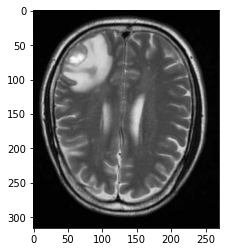

In [19]:
for filename in listdir(augmented_data_path_Y):
  plt.imshow(cv2.imread(str(augmented_data_path_Y)+'/'+filename))
  break;

> **Category Negative**



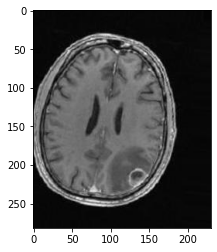

In [20]:
for filename in listdir(augmented_data_path_N):
  plt.imshow(cv2.imread(str(augmented_data_path_N)+'/'+filename))
  break;

## **Data Preparation & Preprocessing**

In order to crop the part that contains only the brain of the image, I used a cropping technique to find the extreme top, bottom, left and right points of the brain. 

In [21]:
def crop_brain_contour(image, plot=False):
    
    #import imutils
    #import cv2
    #from matplotlib import pyplot as plt
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

### **Load Up The Data:**

The following function takes two arguments, the first one is a list of directory paths for the folders 'yes' and 'no' that contain the image data and the second argument is the image size, and for every image in both directories and does the following:



1.  Read the image.
2.  Crop the part of the image representing only the brain.
3.  Resize the image (because the images in the dataset come in different sizes (meaning width, height and # of channels). So, we want all of our images to be (240, 240, 3) to feed it as an input to the neural network.
4. Apply normalization because we want pixel values to be scaled to the range 0-1.
5. Append the image to X and its label to y.

After that, Shuffle X and y, because the data is ordered (meaning the arrays contains the first part belonging to one class and the second part belonging to the other class, and we don't want that).
Finally, Return X and y.

In [22]:

def load_data(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in listdir(directory):
            # load the image
            image = cv2.imread(str(directory) + '/' + filename)
            # crop the brain and ignore the unnecessary rest part of the image
            image = crop_brain_contour(image, plot=False)
            # resize image
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            # normalize values
            image = image / 255.
            # convert image to numpy array and append it to X
            X.append(image)
            # append a value of 1 to the target array if the image
            # is in the folder named 'yes', otherwise append 0.
            if str(directory)[-3:] == 'yes':
                y.append([1])
            else:
                y.append([0])
                
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    
    return X, y

In [23]:
augmented_path = 'augmented data/'

# augmented data (yes and no) contains both the original and the new generated examples
augmented_yes = augmented_data_path_Y 
augmented_no = augmented_data_path_N

IMG_WIDTH, IMG_HEIGHT = (240, 240)

X, y = load_data([augmented_yes, augmented_no], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 2065
X shape is: (2065, 240, 240, 3)
y shape is: (2065, 1)


### **Plot Sample Images**

In [24]:
def plot_sample_images(X, y, n=50):
    """
    Plots n sample images for both values of y (labels).
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """
    
    for label in [0,1]:
        # grab the first n images with the corresponding y values equal to label
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1 # current plot        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            # remove ticks
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                           labelbottom=False, labeltop=False, labelleft=False, labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

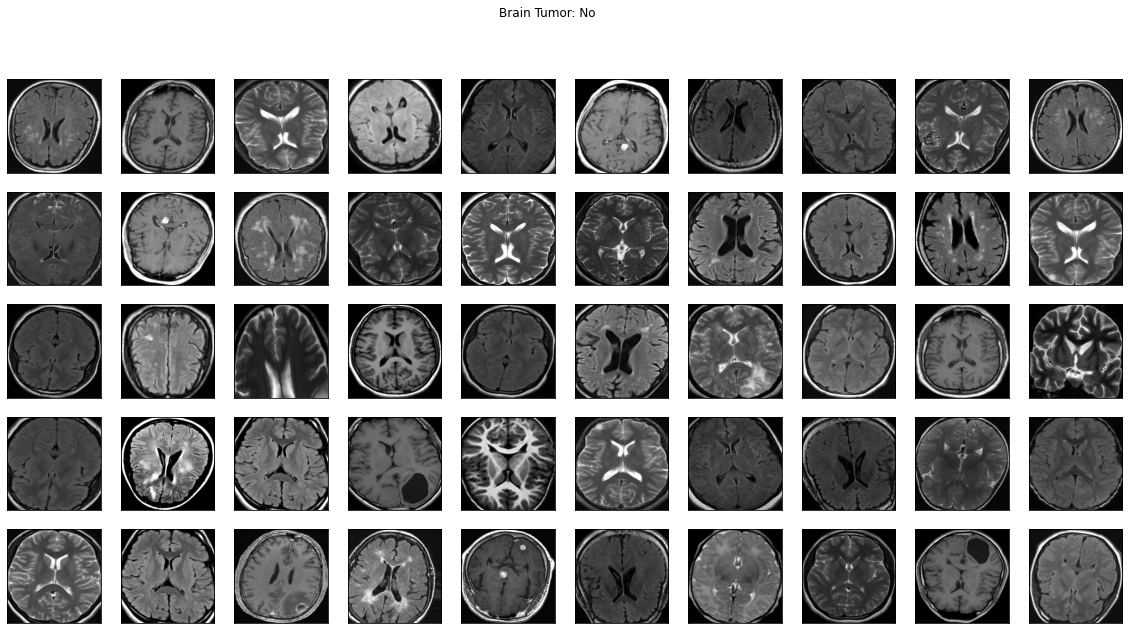

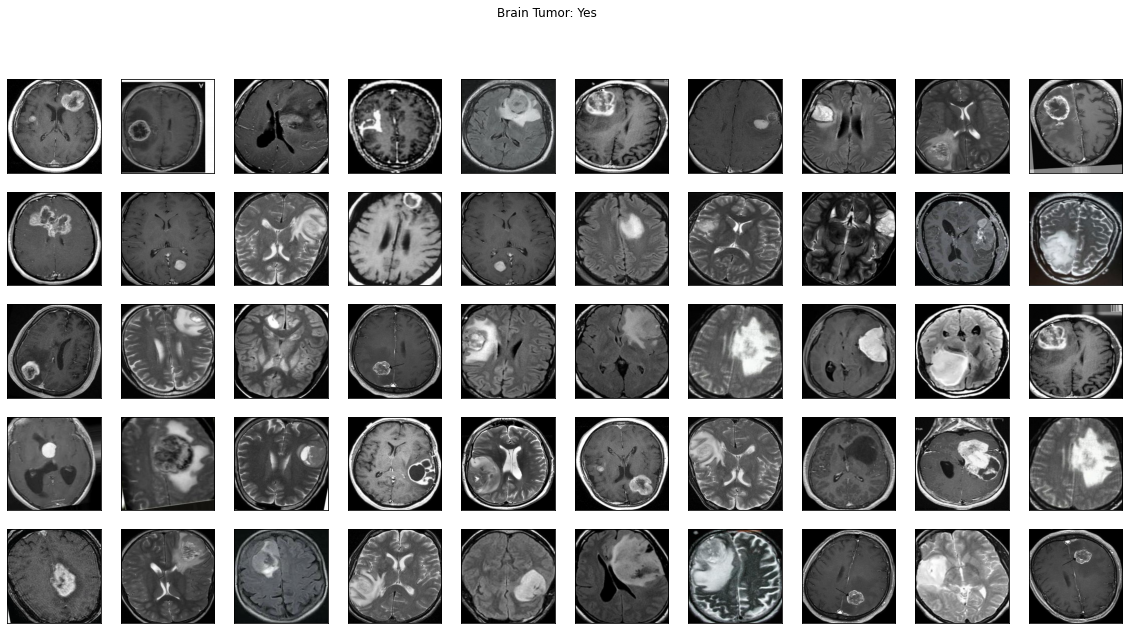

In [25]:
plot_sample_images(X, y)

### **Split the Data into Train(70%) / Dev(15%) / Test(15%)**

In [28]:
def split_data(X, y, test_size=0.2):
       
    """
    Splits data into training, development and test sets.
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    Returns:
        X_train: A numpy array with shape = (#_train_examples, image_width, image_height, #_channels)
        y_train: A numpy array with shape = (#_train_examples, 1)
        X_val: A numpy array with shape = (#_val_examples, image_width, image_height, #_channels)
        y_val: A numpy array with shape = (#_val_examples, 1)
        X_test: A numpy array with shape = (#_test_examples, image_width, image_height, #_channels)
        y_test: A numpy array with shape = (#_test_examples, 1)
    """
    
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [29]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.3)


In [30]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of development examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape[1:]))
print ("Y_train shape: " + str(y_train.shape))
print ("X_val (dev) shape: " + str(X_val.shape))
print ("Y_val (dev) shape: " + str(y_val.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 1445
number of development examples = 310
number of test examples = 310
X_train shape: (240, 240, 3)
Y_train shape: (1445, 1)
X_val (dev) shape: (310, 240, 240, 3)
Y_val (dev) shape: (310, 1)
X_test shape: (310, 240, 240, 3)
Y_test shape: (310, 1)


**Helper Function**

In [31]:
def compute_f1_score(y_true, prob):
    # convert the vector of probabilities to a target vector
    y_pred = np.where(prob > 0.5, 1, 0)
    
    score = f1_score(y_true, y_pred)
    
    return score

## **Build the model**

In [32]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [35]:
epochs = 10
total_train=X_train.shape[0]
total_val=X_val.shape[0]

In [36]:
history = model.fit(
    x=X_train,
    y=y_train,
    steps_per_epoch=total_train,
    epochs=epochs,
    validation_data=(X_val, y_val),
    validation_steps=total_val,
)

Epoch 1/10
1445/1445 [==============================] - 23s 16ms/step - loss: 0.6693 - accuracy: 0.6062 - val_loss: 0.6152 - val_accuracy: 0.7161
Epoch 2/10
1445/1445 [==============================] - 23s 16ms/step - loss: 0.4317 - accuracy: 0.7965 - val_loss: 0.4243 - val_accuracy: 0.7581
Epoch 3/10
1445/1445 [==============================] - 22s 15ms/step - loss: 0.3154 - accuracy: 0.8637 - val_loss: 0.4550 - val_accuracy: 0.8194
Epoch 4/10
1445/1445 [==============================] - 22s 15ms/step - loss: 0.1944 - accuracy: 0.9204 - val_loss: 0.4025 - val_accuracy: 0.8032
Epoch 5/10
1445/1445 [==============================] - 21s 15ms/step - loss: 0.1001 - accuracy: 0.9599 - val_loss: 0.5725 - val_accuracy: 0.8548
Epoch 6/10
1445/1445 [==============================] - 22s 15ms/step - loss: 0.0701 - accuracy: 0.9696 - val_loss: 0.4107 - val_accuracy: 0.8774
Epoch 7/10
1445/1445 [==============================] - 22s 15ms/step - loss: 0.0405 - accuracy: 0.9820 - val_loss: 2.0539 -

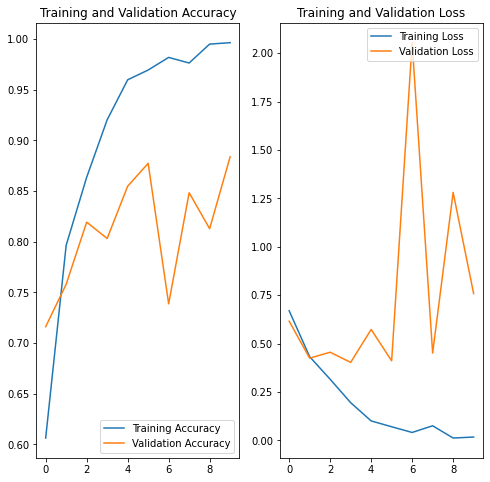

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From the above table and graph, you can detect that this model is creating overfitting problem (99.6% Training Accuracy & 88.3% Val Accuracy) - More than 10% Difference 

"**Variance** is the algorithm’s tendency to learn random things irrespective of the real signal by fitting highly flexible models that follow the error/noise in the data too closely (overfitting)."

### **Model + Regularization**

"**Regularization** is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well."

Here we used **Drop-out Regularization Technique** with Drop-out Rate of 0.5

In [39]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.5),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [40]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 120, 120, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)       

In [41]:
epochs_new= 15

In [42]:
history = model_new.fit(
    x=X_train,
    y=y_train,
    steps_per_epoch=total_train,
    epochs=epochs_new,
    validation_data=(X_val, y_val),
    validation_steps=total_val,
)

Epoch 1/15
1445/1445 [==============================] - 22s 15ms/step - loss: 0.7481 - accuracy: 0.4824 - val_loss: 0.6952 - val_accuracy: 0.5387
Epoch 2/15
1445/1445 [==============================] - 21s 15ms/step - loss: 0.6858 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5419
Epoch 3/15
1445/1445 [==============================] - 21s 15ms/step - loss: 0.6288 - accuracy: 0.5841 - val_loss: 0.5955 - val_accuracy: 0.5935
Epoch 4/15
1445/1445 [==============================] - 21s 15ms/step - loss: 0.5725 - accuracy: 0.6858 - val_loss: 0.5339 - val_accuracy: 0.7000
Epoch 5/15
1445/1445 [==============================] - 21s 15ms/step - loss: 0.4772 - accuracy: 0.7467 - val_loss: 0.5036 - val_accuracy: 0.7129
Epoch 6/15
1445/1445 [==============================] - 21s 15ms/step - loss: 0.3979 - accuracy: 0.8201 - val_loss: 0.5208 - val_accuracy: 0.7323
Epoch 7/15
1445/1445 [==============================] - 21s 15ms/step - loss: 0.2962 - accuracy: 0.8706 - val_loss: 0.4151 -

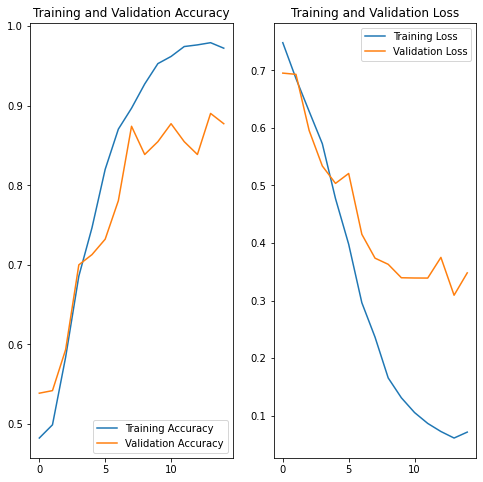

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs_new)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Implementing Model in Test Data Set**

In [44]:
loss, acc = model_new.evaluate(x=X_test, y=y_test)

10/10 [==============================] - 0s 41ms/step - loss: 0.4668 - accuracy: 0.8516


In [45]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.46684205532073975
Test Accuracy = 0.85161292552948


In [46]:
y_test_prob = model_new.predict(X_test)

In [50]:
f1score = compute_f1_score(y_test, y_test_prob)
print(f"F1 score: {f1score}")

F1 score: 0.8606060606060606


In [51]:
def data_percentage(y):
    
    m=len(y)
    n_positive = np.sum(y)
    n_negative = m - n_positive
    
    pos_prec = (n_positive* 100.0)/ m
    neg_prec = (n_negative* 100.0)/ m
    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {n_positive}") 
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {n_negative}")

In [52]:
# the whole data
data_percentage(y)

Number of examples: 2065
Percentage of positive examples: 52.54237288135593%, number of pos examples: 1085
Percentage of negative examples: 47.45762711864407%, number of neg examples: 980


In [56]:
print("Training Data:")
data_percentage(y_train)
print("Validation Data:")
data_percentage(y_val)
print("Testing Data:")
data_percentage(y_test)

Training Data:
Number of examples: 1445
Percentage of positive examples: 54.048442906574394%, number of pos examples: 781
Percentage of negative examples: 45.951557093425606%, number of neg examples: 664
Validation Data:
Number of examples: 310
Percentage of positive examples: 46.12903225806452%, number of pos examples: 143
Percentage of negative examples: 53.87096774193548%, number of neg examples: 167
Testing Data:
Number of examples: 310
Percentage of positive examples: 51.935483870967744%, number of pos examples: 161
Percentage of negative examples: 48.064516129032256%, number of neg examples: 149


In [57]:
y_val_prob = model_new.predict(X_val)

In [58]:
f1score = compute_f1_score(y_val, y_val_prob)
print(f"F1 score: {f1score}")

F1 score: 0.8741721854304637
